# Proyecto

En este modulo vamos a hacer un proyecto entero de aprendizaje supervisado, pasando por todos los pasos del mismo, los cuales son:

* Definición del problema.
* Búsqueda de datos. 
* Análisis exploratorio y limpieza.
* Separación de entrenamiento y validación.
* Entrenamiento.
* Prueba.
* Presentación de resultados. 

## Definición del problema

Todo proyecto de aprendizaje automático parte de una pregunta que se quiere responder, en este caso la pregunta es:

**¿Cuál será la fuerza de combate máxima en el nivel 40 un Pokemon dadas determinadas caracerísticas?**

## Búsqueda de datos

El dataset que se utilizará es de Pokemon, donde describe las características de cada Pokemon (resistencia, ataque, defensa, salud, peso, altura, etc.) de acuerdo a las mismas se puede predecir la fuerza de combate máxima en el nivel 40 que va a alcanzar.

Esta basado en el dataset descargable en [Kaggle](https://www.kaggle.com/datasets/netzuel/pokmon-go-dataset-15-generations) pero tiene realizadas algunas modificaciones por lo que debe ser tomado desde el archivo csv descargado desde la plataforma. 


## Hipótesis

En primer lugar es necesario elaborar una **hipótesis** de qué variables consideran que pueden ser relevantes para predecir la fuerza de combate máxima que va a alcanzar un Pokemon en el nivel 40.

Mi hipótesis es que los pokémon de nivel 40 van a tener fuerza de combate maxima mayor si tienen mayor ataque, defensa, y salud. Creo que que sean legendarios o de tipo dragón tambien va a tener una correlación positivas

In [1]:
# Desde Drive

#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data = pd.read_csv("~/code/escuela2022/ciencia de datos/drive/Clase virtual/Módulo 2/Encuentro 1/pokemon.csv")

In [ ]:
# Desde archivo en compu

#from google.colab import files
#import io

In [ ]:
#filesUploaded = files.upload()

In [ ]:
#data = pd.read_csv(io.BytesIO(filesUploaded["pokemon.csv"]))

In [2]:
#importamos las librerias que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np



## Exploración del dataset

Realizaremos la primer exploración y limpieza del dataset. 
La variable a predecir es *fuerza_combate*.  


Debemos: 
- Ver los primeros tres registros  

In [20]:
data.head(3)

,nombre,indice_guia,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,Weight,Height,Legendario,generacion,fuerza_combate
0,Bulbasaur,1,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,2,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,3,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720


- Ver el tamaño del dataset

In [7]:
data.shape

(649, 15)

- Ver los tipos de datos de cada columna

In [11]:
data.dtypes

nombre              object
indice_guia          int64
resistencia        float64
ataque             float64
defensa            float64
tipo_primario       object
tipo_secundario     object
max_salud          float64
tasa_captura       float64
tasa_escape        float64
Weight             float64
Height             float64
Legendario          object
generacion           int64
fuerza_combate       int64
dtype: object


- Ver las columnas que toma y escribir una pequeña descripción de cada una:

    - nombre: String con el nombre del pokemon

    - indice_guia: int con el numero ID del pokemon 
    
    - resistencia: float con la resistencia del pokemon. Siempre es un numero entero. Hay algunos null
    
    - ataque: float con el poder de ataque del pokemon. Siempre es un numero entero. Hay algunos null
    
    - defensa: float con el poder de ataque del pokemon. Siempre es un numero entero. Hay algunos null
    
    - tipo_primario: Un string que representa uno de varios tipos
    
    - tipo_secundario: Un string que representa uno de varios tipos, o la palabra None.
    
    - max_salud: float con salud maxima del pokemon. Siempre es un numero entero. Hay algunos null
    
    - tasa_captura: float con taza de captura del pokemon. Ni idea como se diferencia esto de la taza de escape.  Hay algunos null
    
    - tasa_escape: float con taza de escape del pokemon. Hay algunos null
    
    - Weight: float con el peso del pokemon. esta en kilogramos
    
    - Height: float con la altura del pokemon. esta en metros. Hay algunos null
    
    - legendario: un string que indica si el pokemon es legendario con un Si o No 
    
    - generacion: un int con el numero de la generacion a la que pertenece
    
    - fuerza_combate: La fuerza de combate del pokemon al final en forma de int

In [12]:
data.columns

Index(['nombre', 'indice_guia', 'resistencia', 'ataque', 'defensa',
       'tipo_primario', 'tipo_secundario', 'max_salud', 'tasa_captura',
       'tasa_escape', 'Weight', 'Height', 'Legendario', 'generacion',
       'fuerza_combate'],
      dtype='object')

In [54]:
for x in data.select_dtypes(include=[np.number]):
    print(x, ": no enteros:", sum(map(lambda x: x!=int(x), data[x].dropna())), "nulos", len(data[x])-len(data[x].dropna()))
type(data.tipo_secundario[3])

indice_guia : no enteros: 0 nulos 0
resistencia : no enteros: 0 nulos 5
ataque : no enteros: 0 nulos 5
defensa : no enteros: 0 nulos 5
max_salud : no enteros: 0 nulos 5
tasa_captura : no enteros: 631 nulos 5
tasa_escape : no enteros: 633 nulos 5
Weight : no enteros: 368 nulos 0
Height : no enteros: 593 nulos 4
generacion : no enteros: 0 nulos 0
fuerza_combate : no enteros: 0 nulos 0


str

- Renombrar las columnas *Weight* (peso) y *Height* (altura) para que esten en español

In [4]:
data.rename(columns={"Weight":"peso", "Height":"altura"}, inplace =True)
data.columns

Index(['nombre', 'indice_guia', 'resistencia', 'ataque', 'defensa',
       'tipo_primario', 'tipo_secundario', 'max_salud', 'tasa_captura',
       'tasa_escape', 'peso', 'altura', 'Legendario', 'generacion',
       'fuerza_combate'],
      dtype='object')

- Usar el métdoo *describe()* para ver las variables numéricas

In [59]:
data.describe()

,indice_guia,resistencia,ataque,defensa,max_salud,tasa_captura,tasa_escape,peso,altura,generacion,fuerza_combate
count,649.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,649.000000,645.000000,649.000000,649.000000
mean,325.000000,168.700311,161.083851,140.324534,144.714286,0.243137,0.083789,57.493374,1.150589,3.052388,1918.006163
std,187.494444,45.648859,56.703088,49.092150,36.012643,0.173944,0.055595,90.558634,1.039428,1.494960,901.856030
min,1.000000,1.000000,17.000000,32.000000,12.000000,0.000000,0.000000,0.100000,0.100000,1.000000,274.000000
25%,163.000000,137.000000,118.000000,99.000000,120.000000,0.100000,0.060000,10.100000,0.600000,2.000000,1144.000000
50%,325.000000,163.000000,159.000000,136.500000,140.000000,0.200000,0.070000,29.000000,1.000000,3.000000,1859.000000
75%,487.000000,190.000000,204.250000,174.000000,162.000000,0.300000,0.100000,61.000000,1.400000,4.000000,2564.000000
max,649.000000,496.000000,345.000000,396.000000,403.000000,1.000000,0.990000,950.000000,14.500000,5.000000,4431.000000


- Usar el método *corr()* para ver la correlación entre las variables

In [60]:
data.corr()

,indice_guia,resistencia,ataque,defensa,max_salud,tasa_captura,tasa_escape,peso,altura,generacion,fuerza_combate
indice_guia,1.000000,0.119890,0.174727,0.102534,0.120125,-0.135638,-0.149535,0.114777,-0.005688,0.977453,0.185219
resistencia,0.119890,1.000000,0.409340,0.344523,0.999969,-0.363608,-0.361307,0.383728,0.386985,0.085182,0.598645
ataque,0.174727,0.409340,1.000000,0.490581,0.408809,-0.502650,-0.411624,0.401336,0.396145,0.121585,0.924768
defensa,0.102534,0.344523,0.490581,1.000000,0.344576,-0.482818,-0.481946,0.469854,0.393019,0.045170,0.707271
max_salud,0.120125,0.999969,0.408809,0.344576,1.000000,-0.363894,-0.361581,0.384049,0.387088,0.085383,0.598311
tasa_captura,-0.135638,-0.363608,-0.502650,-0.482818,-0.363894,1.000000,0.498221,-0.360086,-0.352023,-0.122518,-0.568356
tasa_escape,-0.149535,-0.361307,-0.411624,-0.481946,-0.361581,0.498221,1.000000,-0.268499,-0.254243,-0.120099,-0.506817
peso,0.114777,0.383728,0.401336,0.469854,0.384049,-0.360086,-0.268499,1.000000,0.637984,0.082506,0.540116
altura,-0.005688,0.386985,0.396145,0.393019,0.387088,-0.352023,-0.254243,0.637984,1.000000,-0.038939,0.487098
generacion,0.977453,0.085182,0.121585,0.045170,0.085383,-0.122518,-0.120099,0.082506,-0.038939,1.000000,0.122806


- De la variable a predecir **fuerza_combate** ver los valores máximo, mínimo y promedio y hacer un gráfico *displot* para ver la distribución

minimo: 274, maximo: 4431, promedio:1918.01


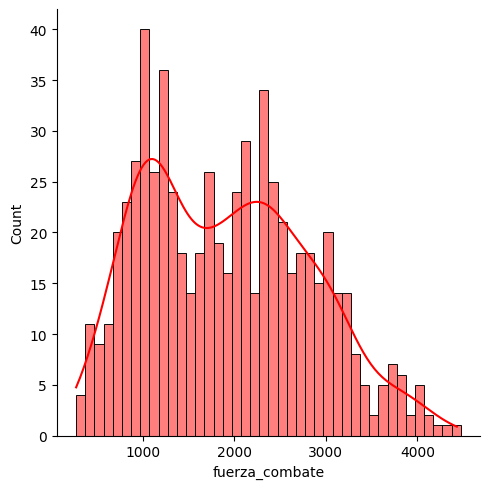

In [104]:
print(f"minimo: {data['fuerza_combate'].min()}, maximo: {data['fuerza_combate'].max()}, promedio:{round(data['fuerza_combate'].mean(),2)}")
sns.displot(data['fuerza_combate'], color="red", binwidth=100, kde=True) #no encontré como sacar los bordes negros :(

- De la variable **resistencia** ver los valores máximo, mínimo y promedio y hacer un gráfico *displot* para ver la distribución

minimo: 1.0, maximo: 496.0, promedio:168.7


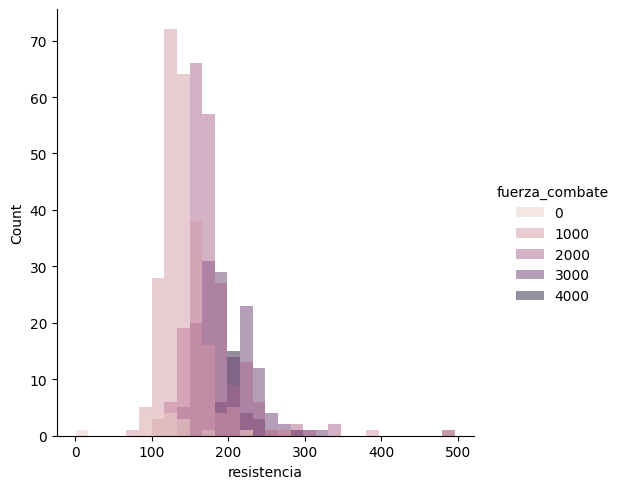

In [115]:
print(f"minimo: {data['resistencia'].min()}, maximo: {data['resistencia'].max()}, promedio:{round(data['resistencia'].mean(),2)}")
resdata=data.copy()
resdata.fuerza_combate=resdata.fuerza_combate.round(-3)
sns.displot(data=resdata,x='resistencia', color="red", bins=30, kde=0, linewidth=0, hue='fuerza_combate', edgecolor="white") #pero yo queria bordes blancos

- De la variable **tipo_primario** ver los valores que toma y cuántos registros de cada uno y hacer un gráfico *countplot* para visualizarlo

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' nan 'Dark'
 'Steel' 'Flying']


<AxesSubplot:xlabel='tipo_primario', ylabel='count'>

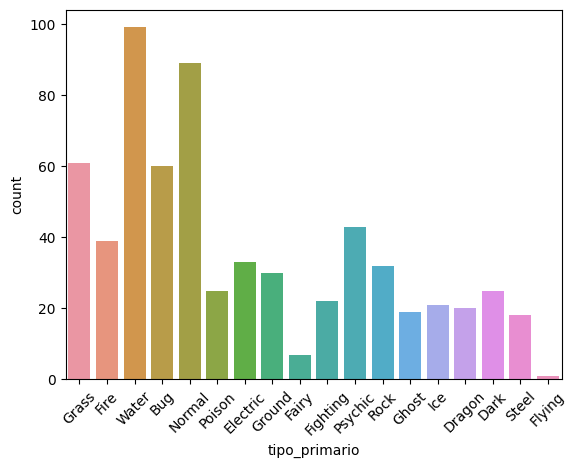

In [113]:
print(data['tipo_primario'].unique())
plt.xticks(rotation=45)
sns.countplot(x=data['tipo_primario'])



- De la variable **legendario** ver los valores que toma y cuántos registros de cada uno y hacer un gráfico *countplot* para visualizarlo



['No' 'Sí' nan]


<AxesSubplot:xlabel='Legendario', ylabel='count'>

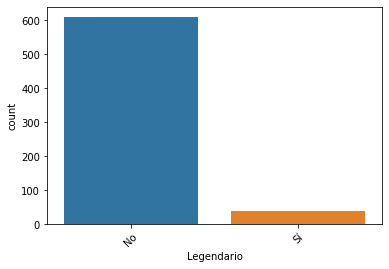

In [8]:
print(data['Legendario'].unique())
plt.xticks(rotation=45)
sns.countplot(x=data['Legendario'])

- Luego de realizar la exploración, pensar que variables no serían necesarias en un modelo y eliminarlas
El nombre y el indice son inecesarias. La de la generaión podría servir para ver si las generaciones van volviendose mas o menos fuertes en el tiempo, pero es dudoso.

In [5]:
data.drop(columns=["nombre", "indice_guia", "generacion"], inplace =True)

### Limpieza de datos - nulos

- Revisar si el dataset tiene datos nulos y cuántos por columnas

In [37]:
print(data.isna().sum())
data.loc[data.resistencia.isna()]


resistencia        5
ataque             5
defensa            5
tipo_primario      5
tipo_secundario    5
max_salud          5
tasa_captura       5
tasa_escape        5
peso               0
altura             4
Legendario         1
fuerza_combate     0
dtype: int64


,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,fuerza_combate
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,0.61,No,1708
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,5.21,Sí,3703
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.4,1.50,No,2211
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.3,1.90,No,2345
580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.2,1.30,No,2088


- En cada caso definir si se debe **imputar**, **eliminar** o **marcar** los datos nulos de acuerdo a los criterios vistos en clase. Se pueden reemplazar valores con datos específicos o con una lista creada de manera aleatoria, usar métodos de pandas como *fillna* o *dropna*

In [6]:
#data.loc[data["tipo_primario"].isnull()]
#data.dropna(inplace=True)
data = data.dropna(thresh=6)
data.isna().sum()

resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
max_salud          0
tasa_captura       0
tasa_escape        0
peso               0
altura             4
Legendario         1
fuerza_combate     0
dtype: int64

In [7]:
#data.loc[data.altura.isna()]
data["altura"]=data["altura"].fillna(round(data["altura"].mean(),2))
print(data.isna().sum(),data["Legendario"].value_counts())
data["Legendario"]=data["Legendario"].fillna("No")
data.isna().sum(),

resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
max_salud          0
tasa_captura       0
tasa_escape        0
peso               0
altura             0
Legendario         1
fuerza_combate     0
dtype: int64 No    605
Sí     38
Name: Legendario, dtype: int64


(resistencia        0
 ataque             0
 defensa            0
 tipo_primario      0
 tipo_secundario    0
 max_salud          0
 tasa_captura       0
 tasa_escape        0
 peso               0
 altura             0
 Legendario         0
 fuerza_combate     0
 dtype: int64,)

In [73]:
data

,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,fuerza_combate
0,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1115
1,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1699
2,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,2720
3,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,980
4,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1653
...,...,...,...,...,...,...,...,...,...,...,...,...
644,205.0,261.0,182.0,Ground,Flying,173.0,0.02,0.01,68.0,1.5,Sí,3588
645,245.0,246.0,170.0,Dragon,Ice,205.0,0.02,0.01,325.0,3.0,Sí,3575
646,209.0,260.0,192.0,Water,Fighting,177.0,0.02,0.01,48.5,1.4,No,3698
647,225.0,250.0,225.0,Normal,Psychic,189.0,0.02,0.01,6.5,0.6,No,3972


### Variables categóricas y numéricas

- Revisar los tipos de datos que tiene cada columna del dataset

In [75]:
data.dtypes

resistencia        float64
ataque             float64
defensa            float64
tipo_primario       object
tipo_secundario     object
max_salud          float64
tasa_captura       float64
tasa_escape        float64
peso               float64
altura             float64
Legendario          object
fuerza_combate       int64
dtype: object

- En el caso que haya variables categóricas convertirlas en numéricas: en el caso que sean variables categróricas nominales deben ser convertidas en variables dummies, para esto pueden reemplazarse valores con *apply* y *lambda*, creando una función propia o utilizando el método de pandas *get_dummies*.

In [8]:
#quizas valdria la pena combinar los tipos primarios y secundarios en uno solo. despues lo pruebo quizas.
data["Legendario"]=data["Legendario"].apply(lambda x: x[0]=='S')
prim_dummies=pd.get_dummies(data["tipo_primario"], prefix= "prim_")# no dropeo la primera pq aunque no se pierden datos no hay 
sec_dummies=pd.get_dummies(data["tipo_secundario"], prefix= "sec_")# que recordar cual se dropeo si estoy graficando
data=data.join(prim_dummies).join(sec_dummies)
data.drop(columns=["tipo_primario", "tipo_secundario"], inplace =True)
data

,resistencia,ataque,defensa,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,fuerza_combate,...,sec__Ghost,sec__Grass,sec__Ground,sec__Ice,sec__None,sec__Poison,sec__Psychic,sec__Rock,sec__Steel,sec__Water
0,128.0,118.0,111.0,113.0,0.20,0.10,6.9,0.7,False,1115,...,0,0,0,0,0,1,0,0,0,0
1,155.0,151.0,143.0,134.0,0.10,0.07,13.0,1.0,False,1699,...,0,0,0,0,0,1,0,0,0,0
2,190.0,198.0,189.0,162.0,0.05,0.05,100.0,2.0,False,2720,...,0,0,0,0,0,1,0,0,0,0
3,118.0,116.0,93.0,105.0,0.20,0.10,8.5,0.6,False,980,...,0,0,0,0,1,0,0,0,0,0
4,151.0,158.0,126.0,131.0,0.10,0.07,19.0,1.1,False,1653,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,205.0,261.0,182.0,173.0,0.02,0.01,68.0,1.5,True,3588,...,0,0,0,0,0,0,0,0,0,0
645,245.0,246.0,170.0,205.0,0.02,0.01,325.0,3.0,True,3575,...,0,0,0,1,0,0,0,0,0,0
646,209.0,260.0,192.0,177.0,0.02,0.01,48.5,1.4,False,3698,...,0,0,0,0,0,0,0,0,0,0
647,225.0,250.0,225.0,189.0,0.02,0.01,6.5,0.6,False,3972,...,0,0,0,0,0,0,1,0,0,0


### División de datos de entrenamiento y testeo

Completar los espacios _______ con el código que corresponda

In [9]:
# Definir X e y siendo X las variables predictoras e y la variable a predecir

X= data.drop(columns="fuerza_combate")
y=data["fuerza_combate"]

In [10]:
# importamos train_test_split de la libreria scikit-learn

from sklearn.model_selection import train_test_split 

In [11]:
# Definimos X de entrenamiento y de testeo e y de entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [81]:
# Revisamos que esté correctamente realizada la operación

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(483, 45)
(483,)
(161, 45)
(161,)


### Entrenamiento del modelo


Completar los espacios _______ con el código que corresponda

In [12]:
# Importamos el modelo que utilizaremos. Regresión lineal

from sklearn.linear_model import LinearRegression

In [13]:
# Definimos un objeto con el modelo importado, en este caso los hiperparametros son por default por lo que el parentesis está vacio

modelo_rl = LinearRegression()


In [14]:
# Realizamos el entrenamiento del modelo con el método fit y los datos de entrenamiento 

modelo_rl.fit(X_train, y_train)

LinearRegression()

In [85]:
# Observamos los parámetros del modelo entrenado
# Coeficiente (la pendiente de la recta)

modelo_rl.coef_


array([  16.78768291,   10.83970791,    4.81477212,  -15.95054132,
          4.7542316 ,  -49.69872642,    0.65418141,  -22.80224456,
        180.36644882,   16.50342256,  -39.22096843,   55.52583996,
          4.24574442,   88.23777051,  -11.48317269,    4.11825238,
        -60.52140624,  -28.69448001,   17.01396547,   54.27219047,
          1.26801892,   26.19130043,   36.5261013 ,   -4.94135516,
        -91.8011168 ,  -91.32592175,   24.08581467,   35.46579829,
       -115.08093727,    2.13552545,  -19.73167533,   49.12167013,
         65.12054245,   17.38697427,   10.13172606, -128.38454404,
         49.38965559,   23.60570254,   -8.53330392,    1.08939034,
         12.29803157,   59.42553776,  -55.05033898,  -36.51754241,
         38.12778752])

In [86]:
# Intercepto (el punto de comienzo de la recta en el eje y)

modelo_rl.intercept_

-1059.5252999739898

### Testeo del modelo


Completar los espacios _______ con el código que corresponda

In [15]:
# Probar nuestro modelo con predict y los datos de test

y_pred = modelo_rl.predict(X_test)

In [88]:
# Importar la métrica que se utiliza para medir la performance modelo de regresión lineal: R2

from sklearn.metrics import r2_score


In [89]:
# Utilizar R2 para medir la performance del modelo

r2_score(y_test,y_pred)


0.9770022292324145

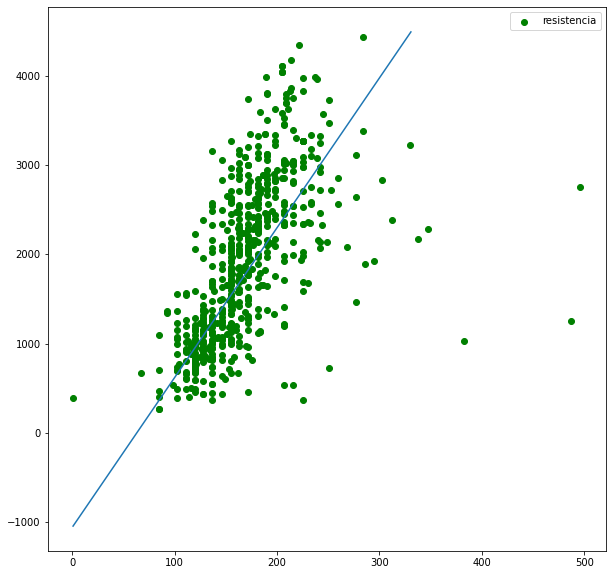

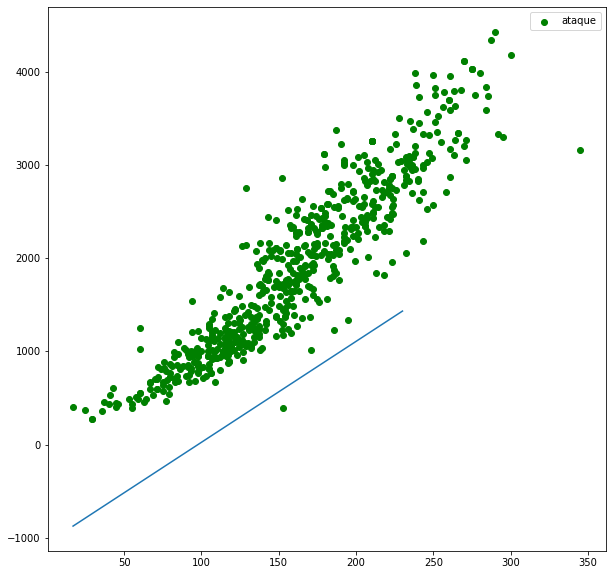

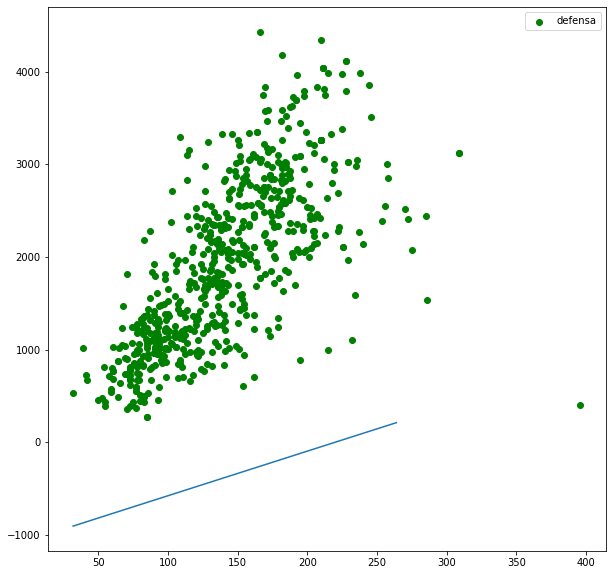

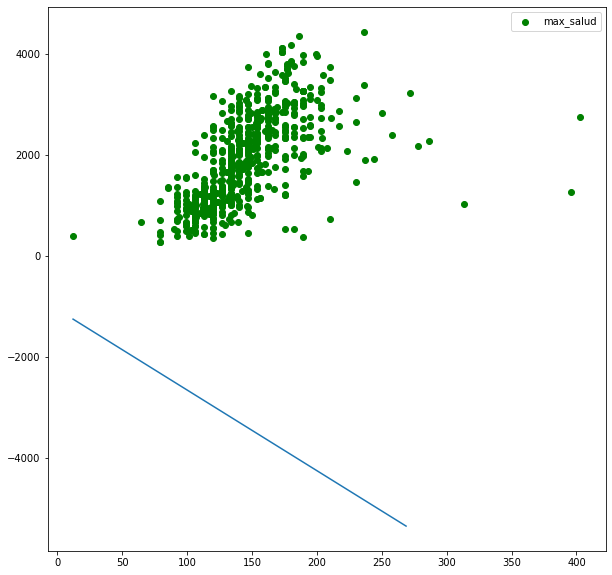

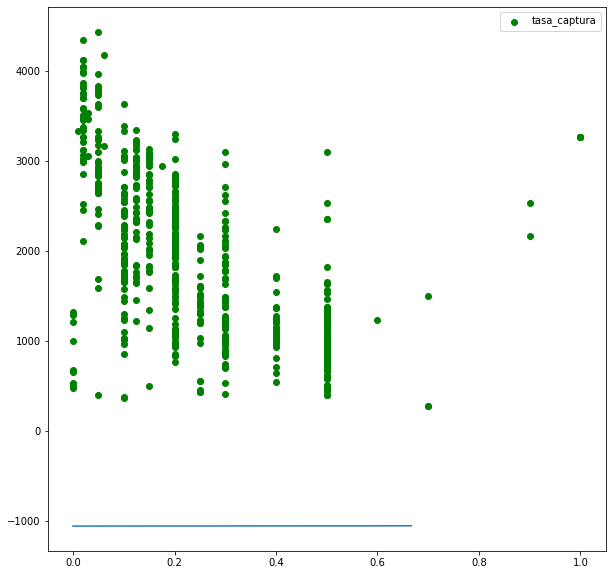

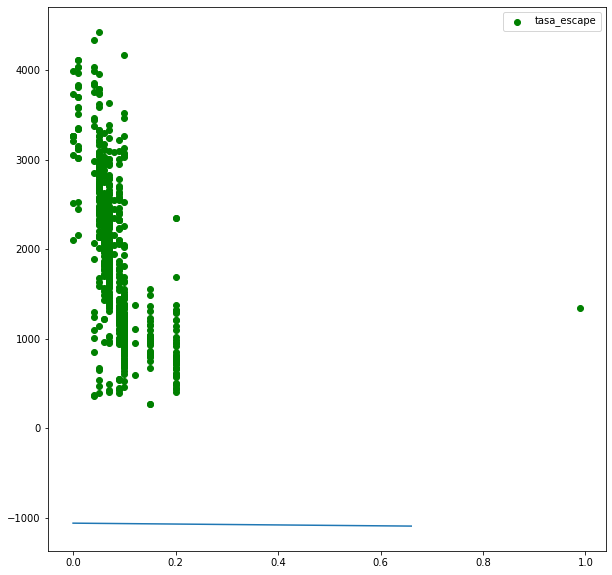

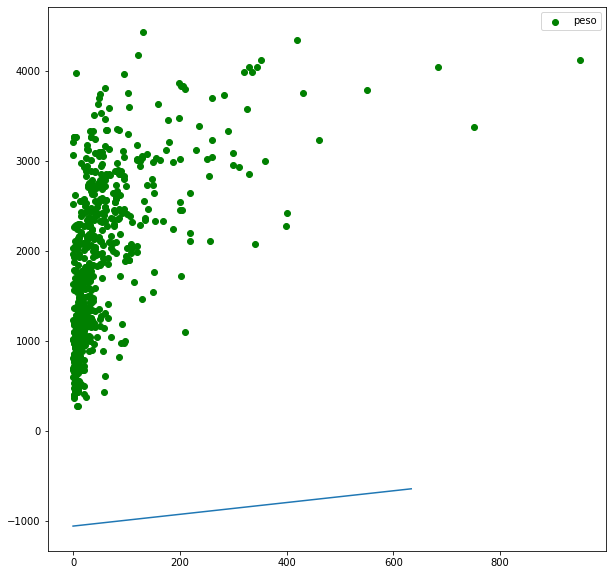

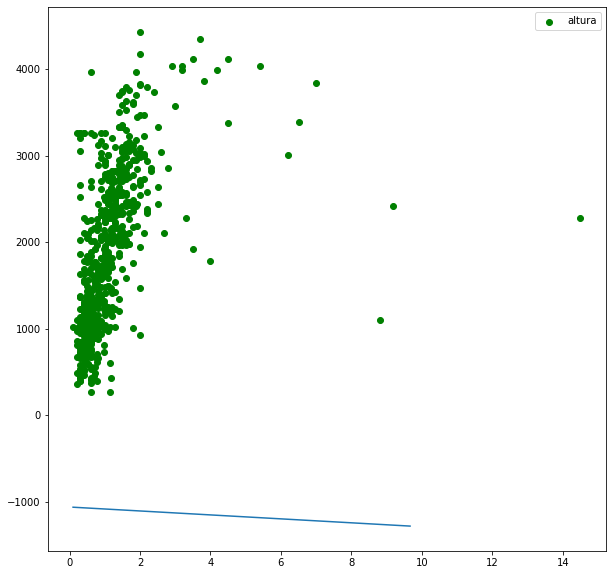

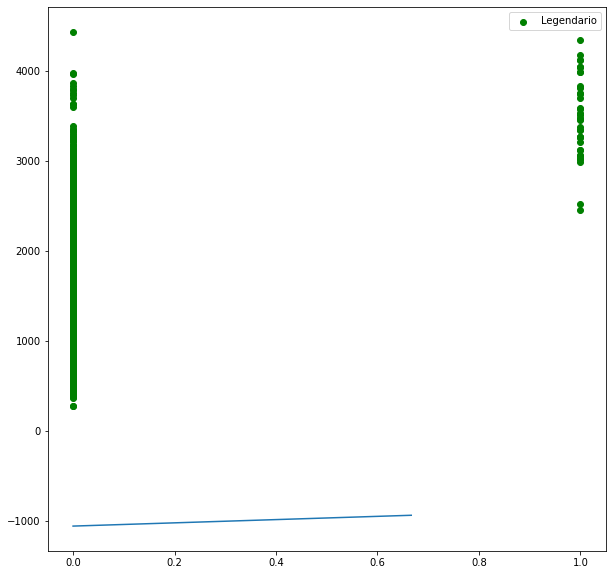

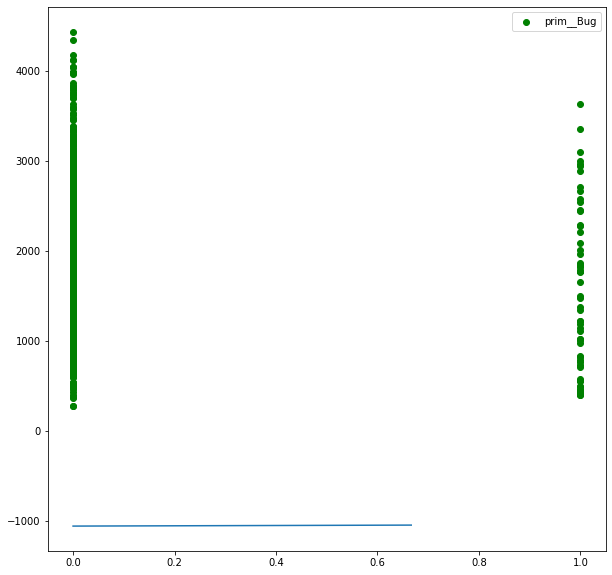

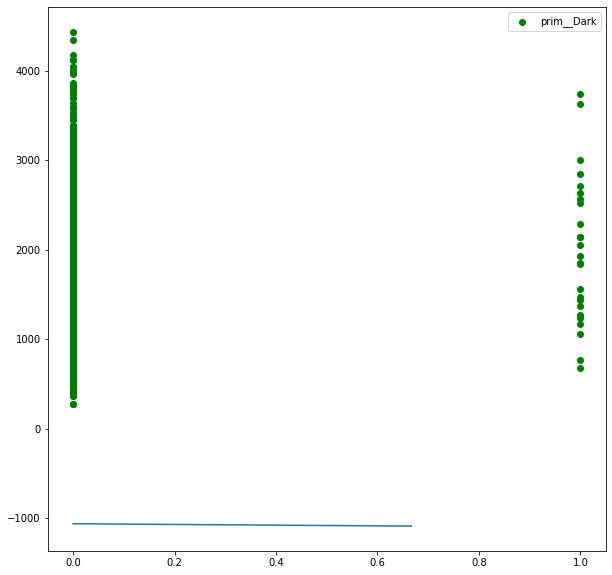

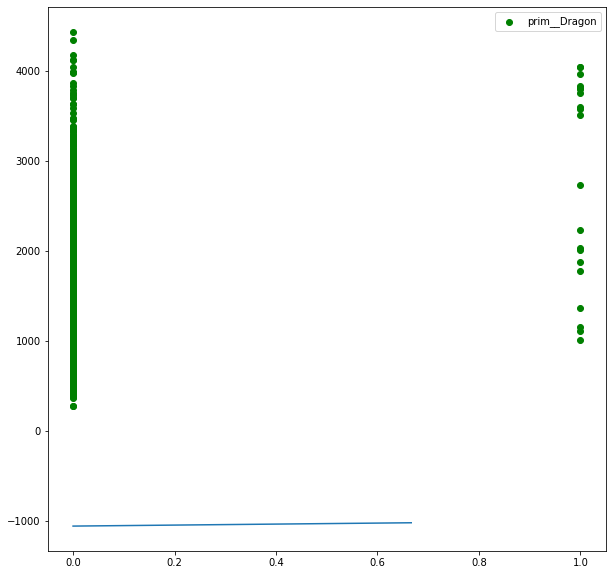

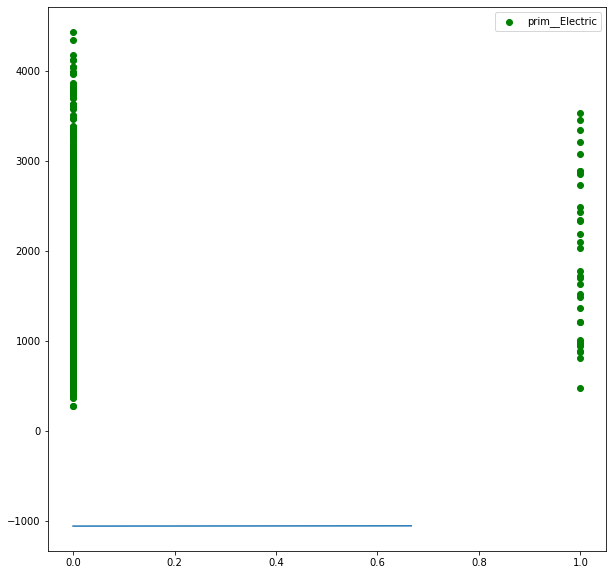

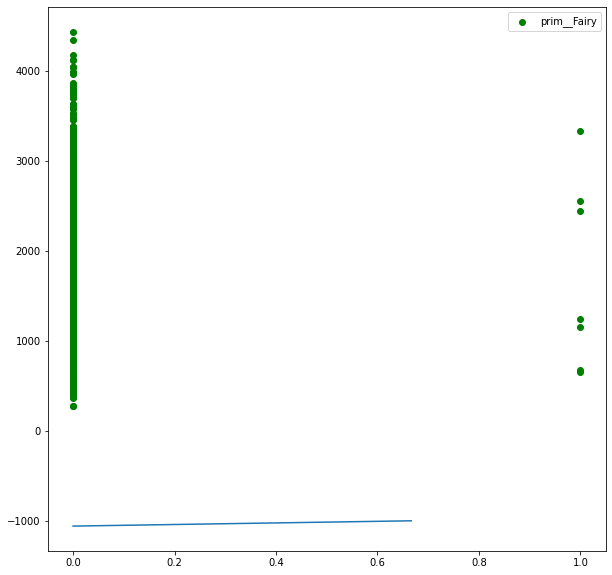

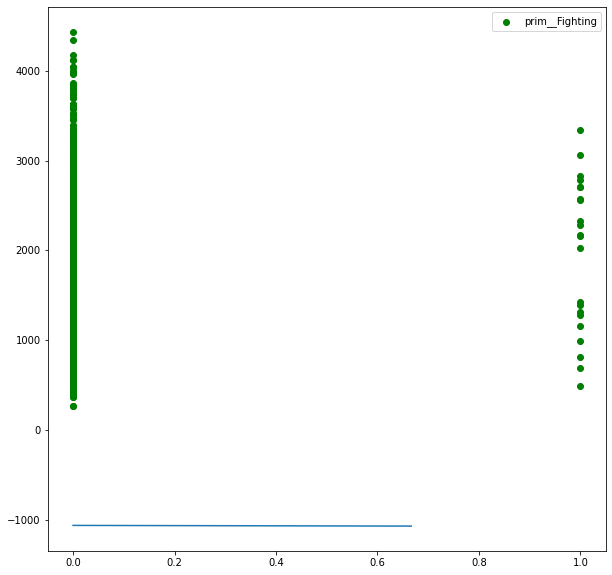

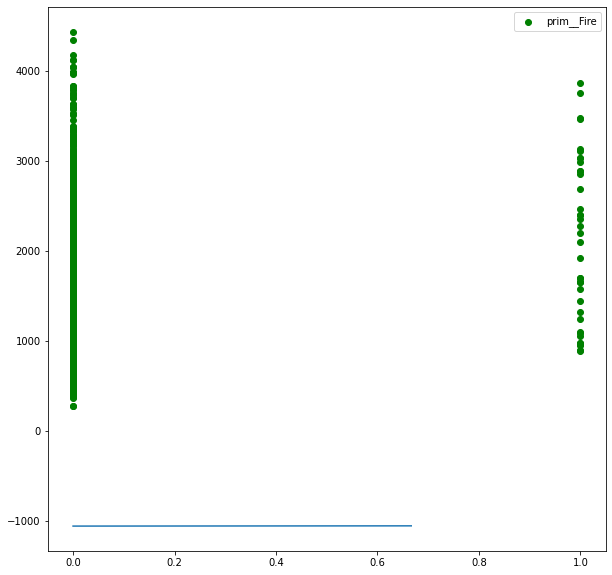

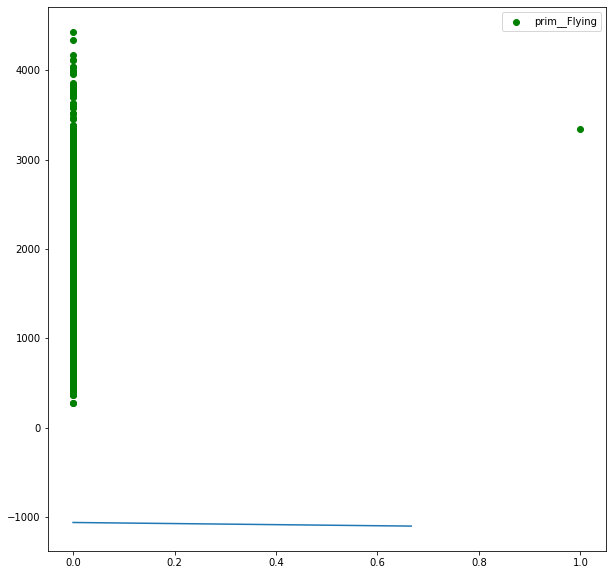

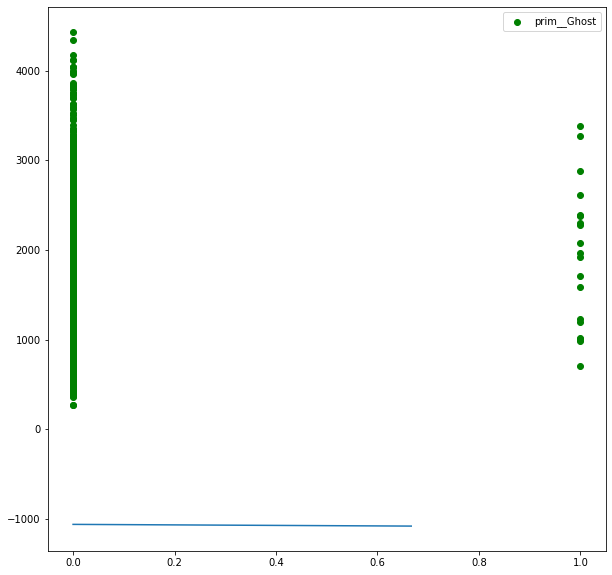

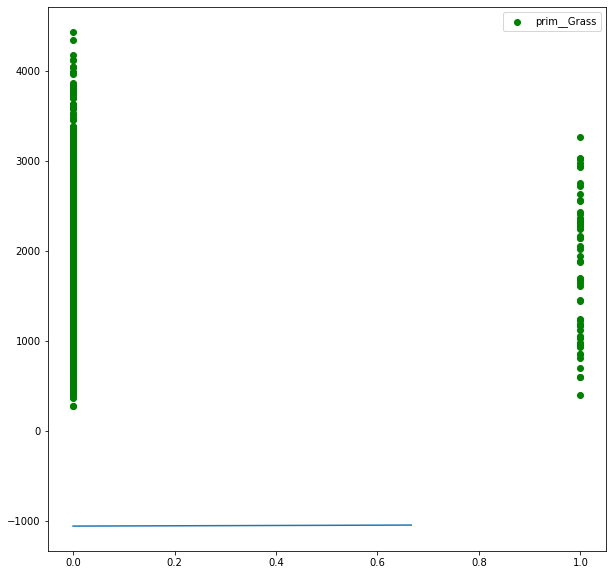

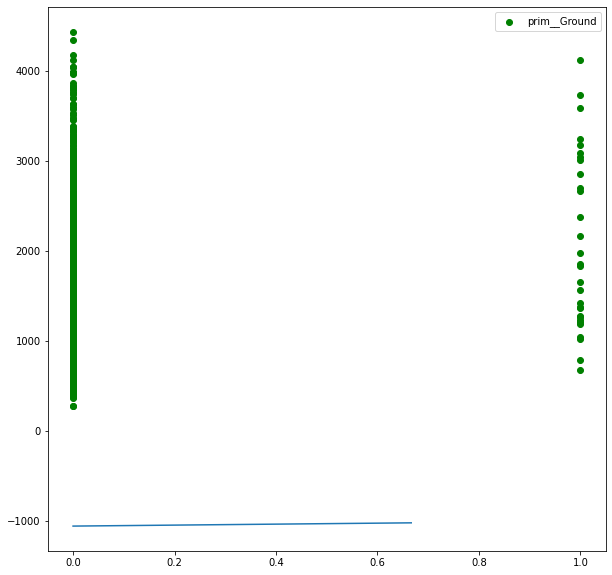

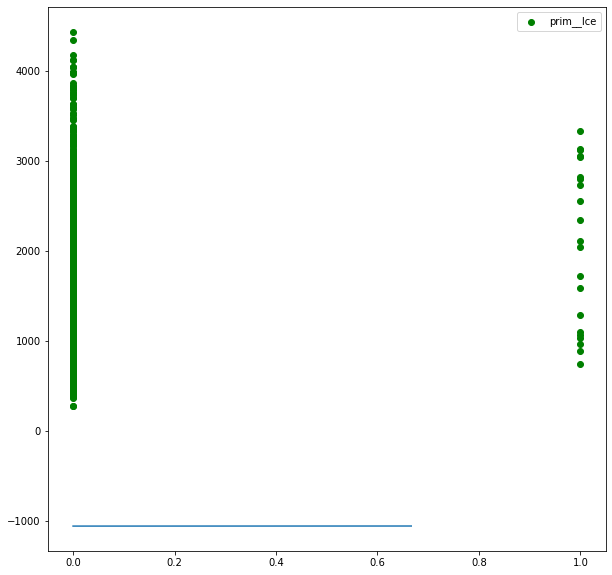

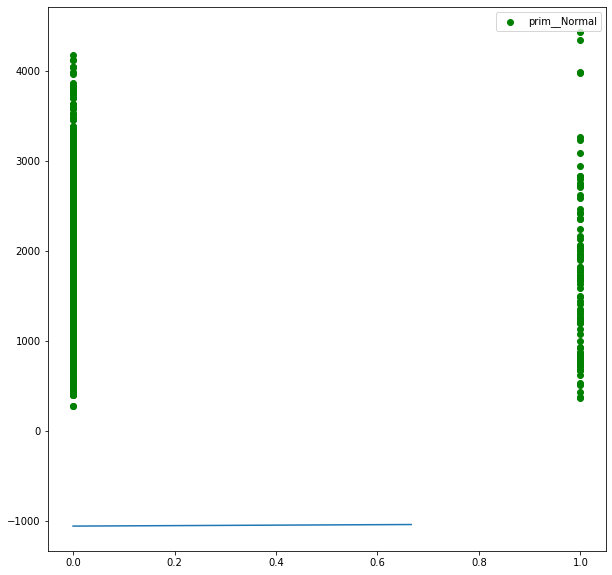

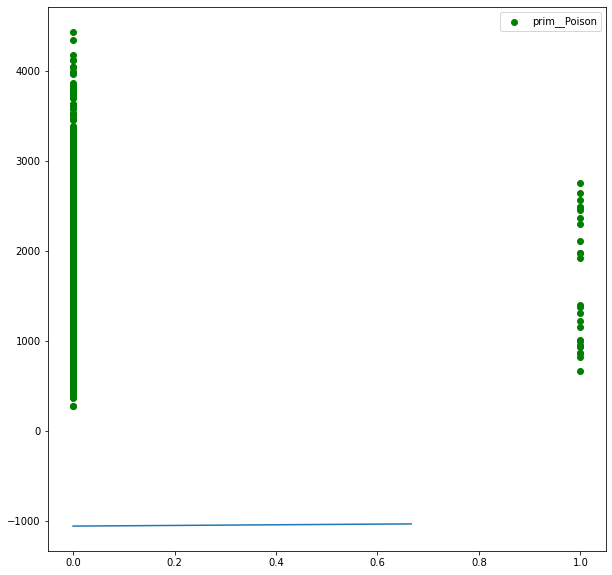

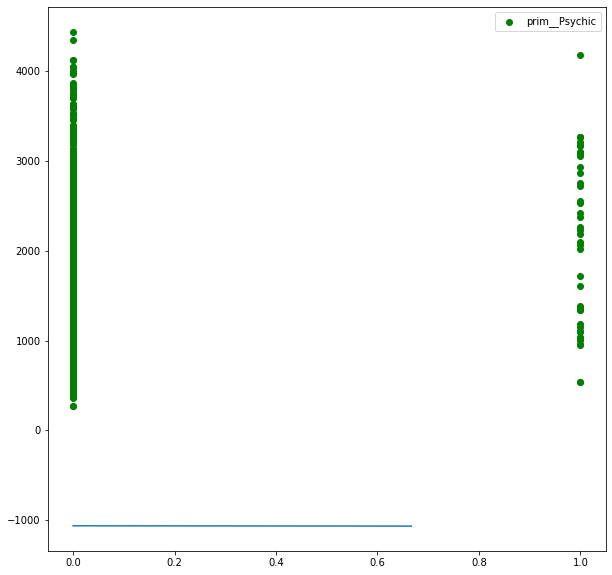

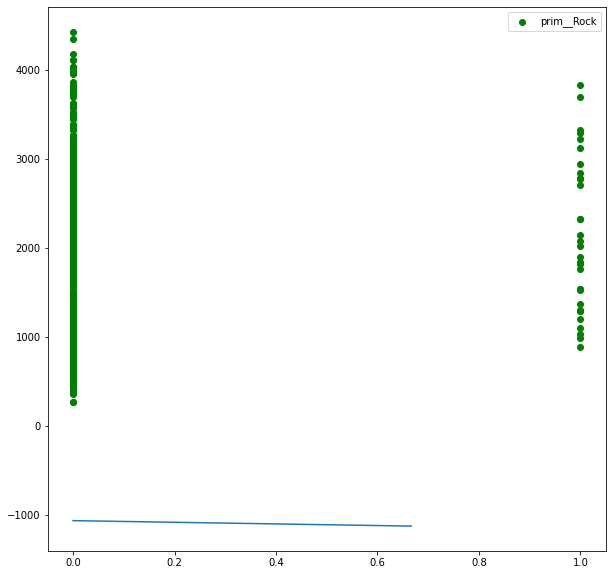

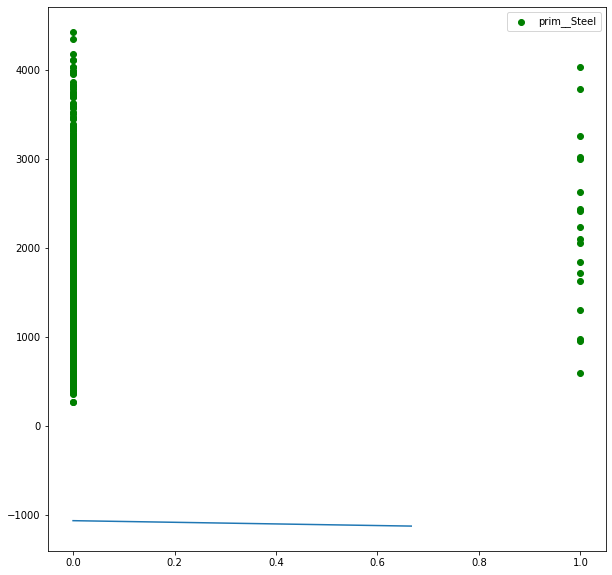

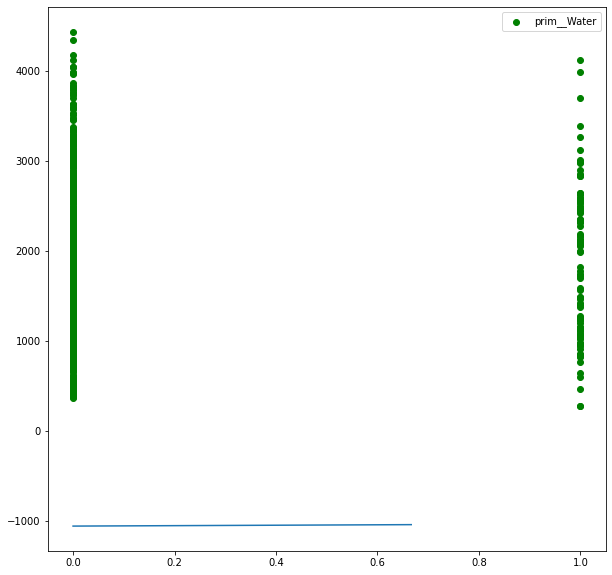

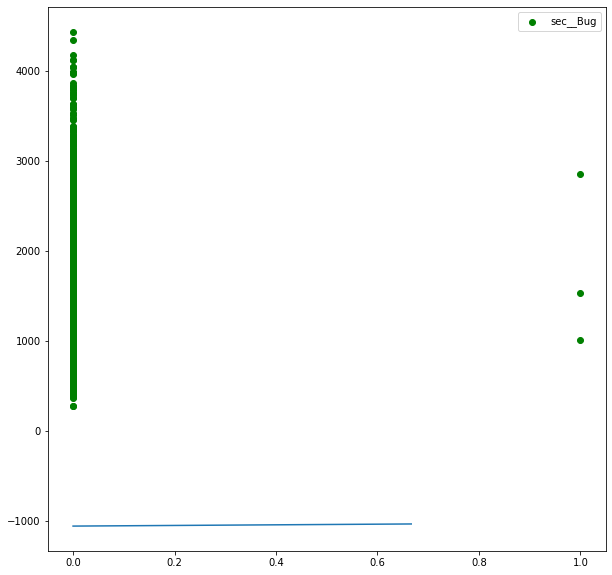

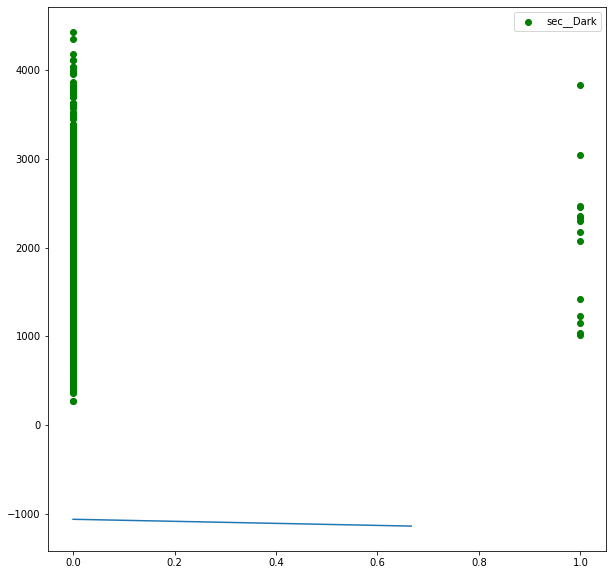

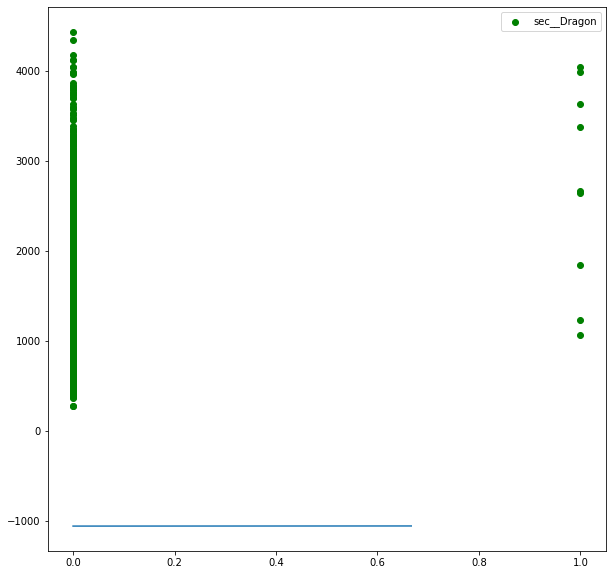

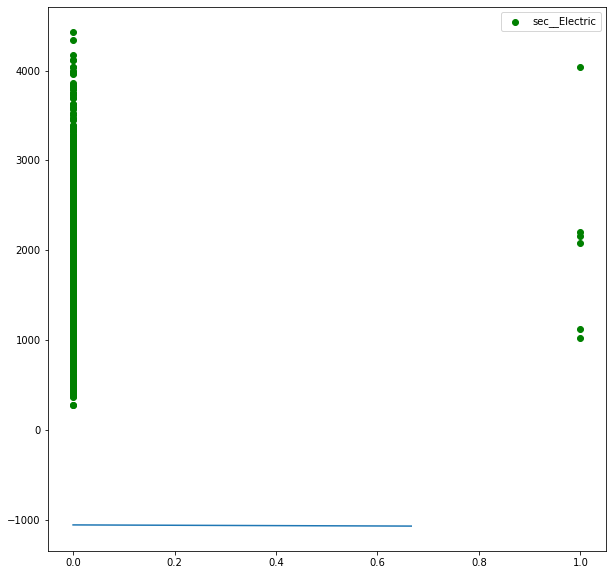

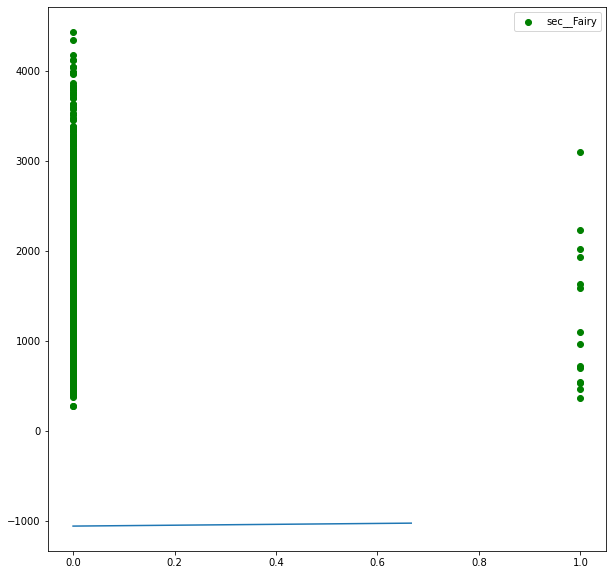

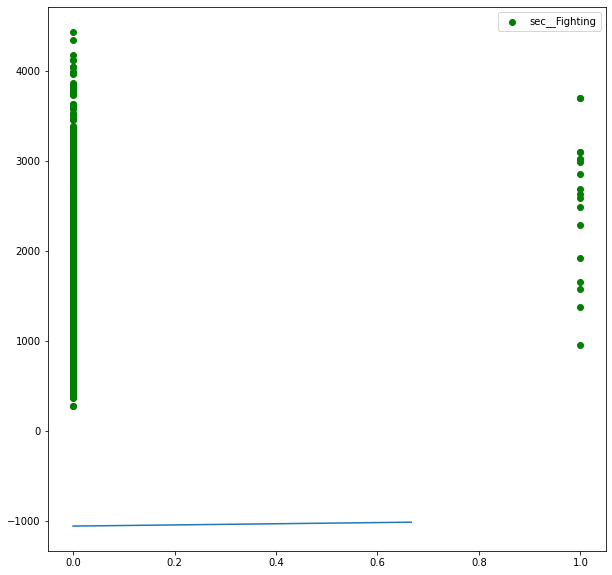

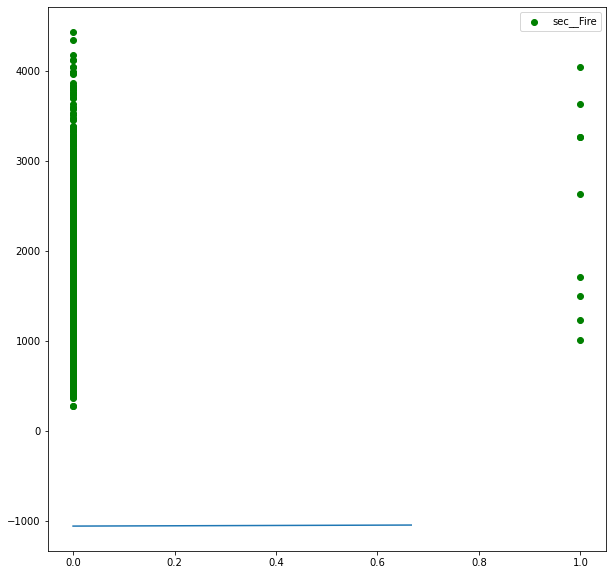

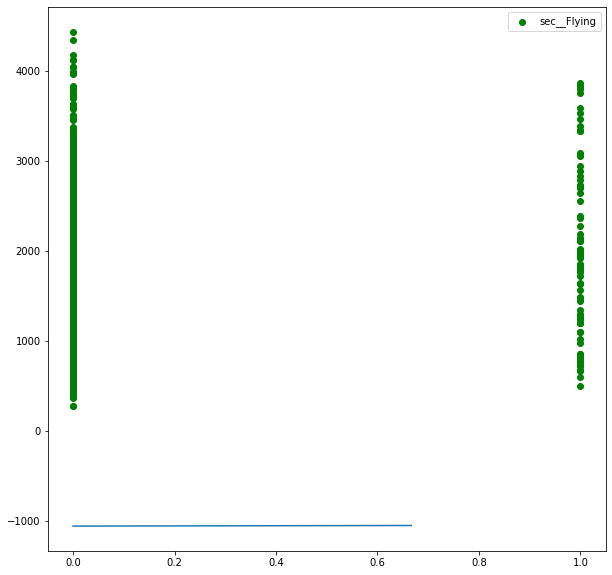

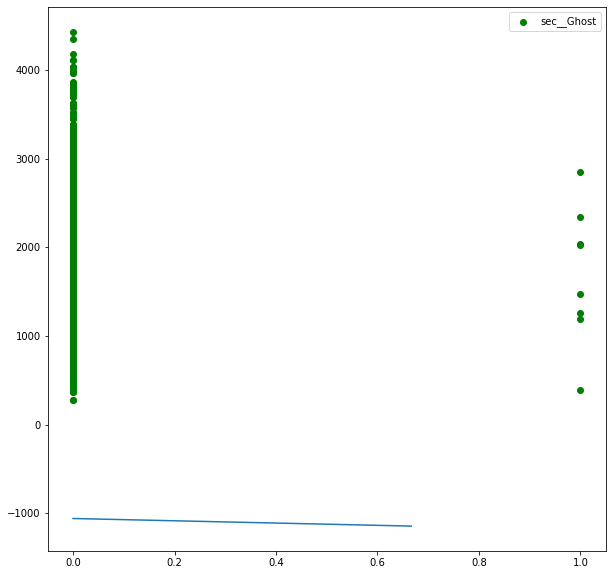

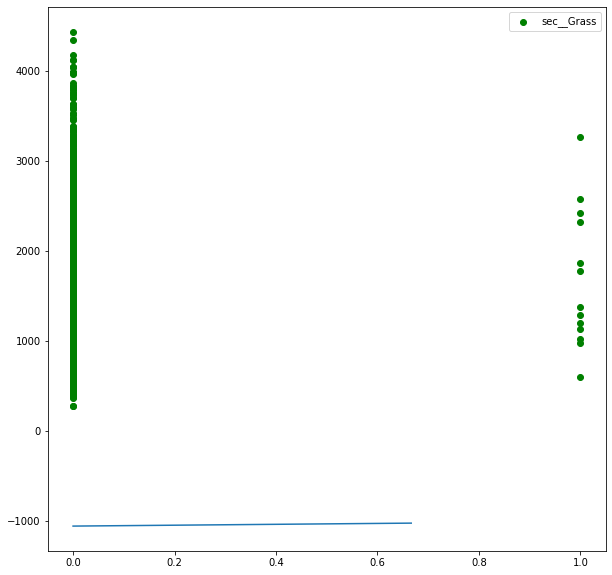

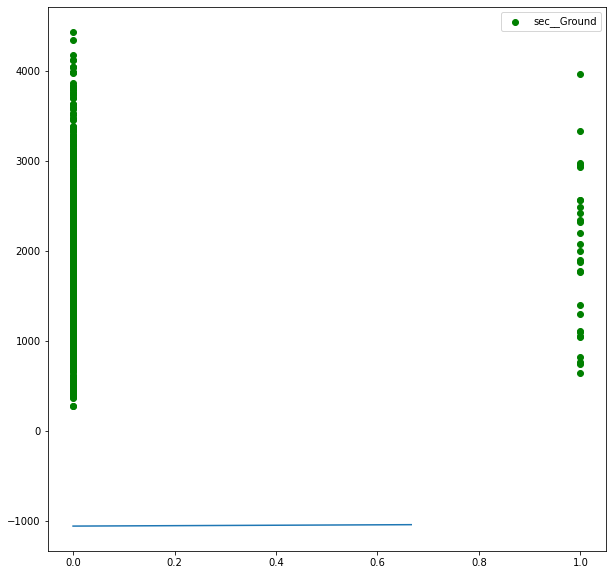

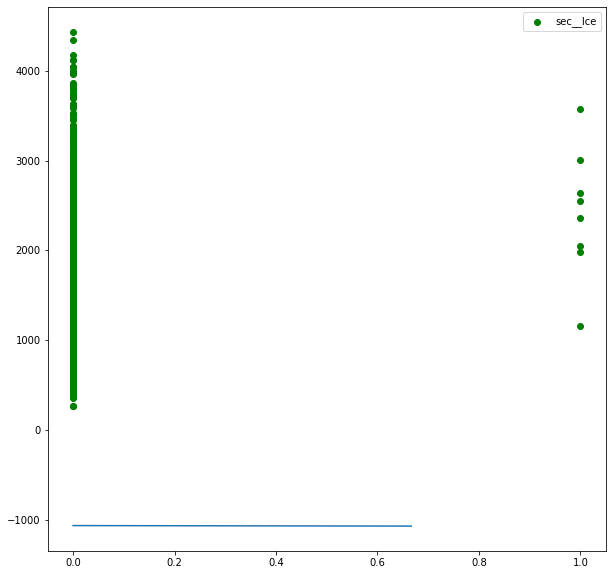

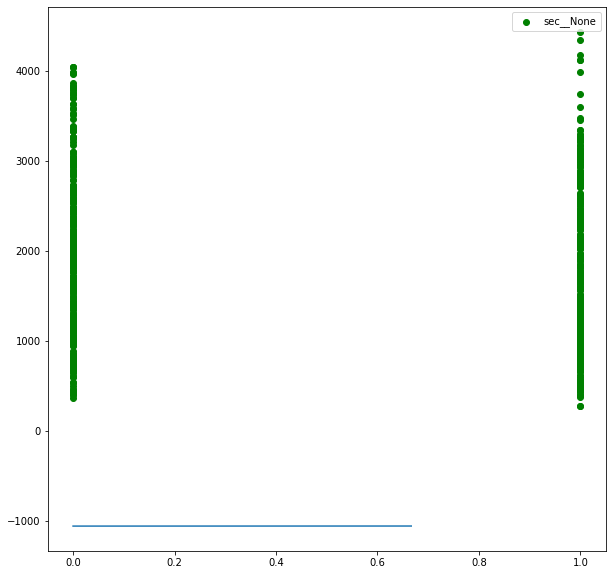

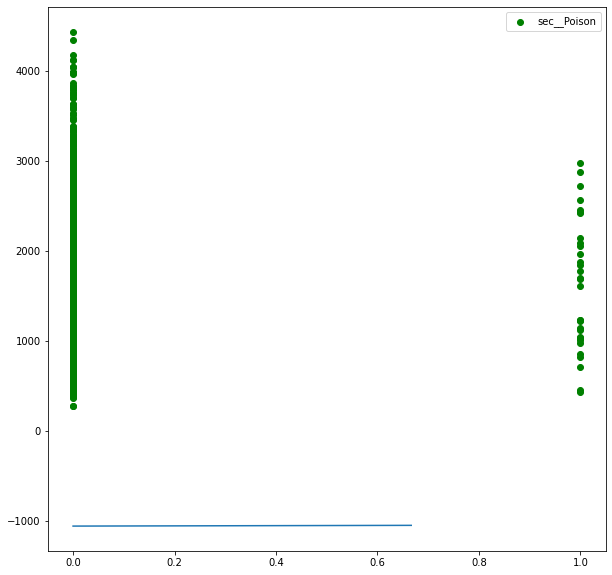

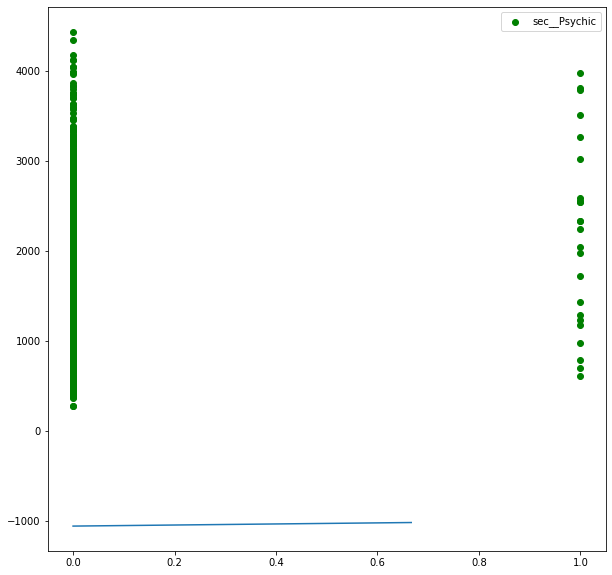

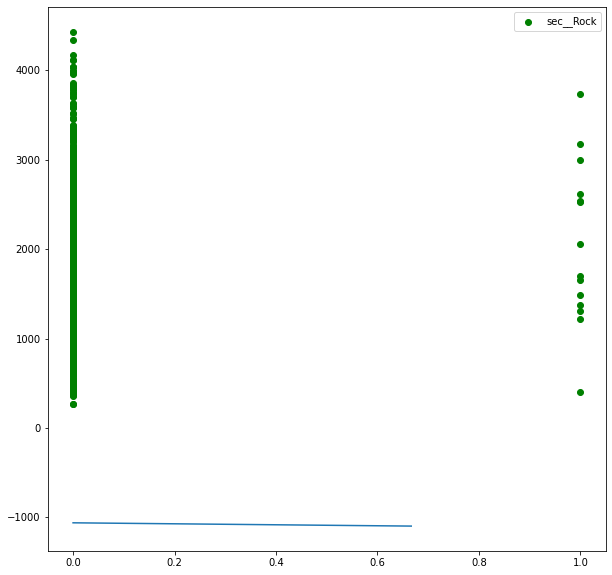

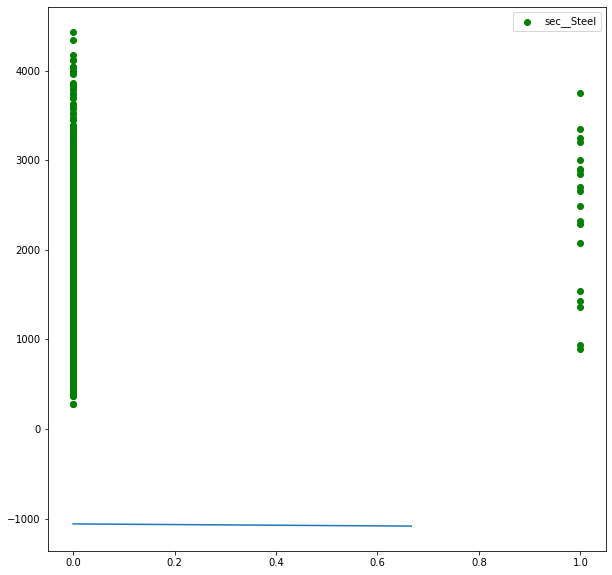

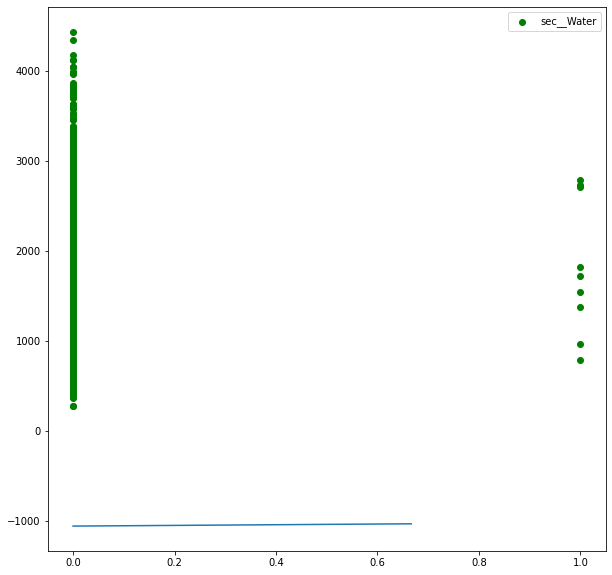

In [127]:
for i,item in enumerate(X.columns):
    plt.figure(figsize = (10,10))
    #plt.plot(modelo_rl.coef_[0], modelo_rl.intercept_, color = 'b', label = 'Regresión lineal')
    x = np.linspace(min(X[item]),max(X[item])/1.5,100)
    plt.plot(x, modelo_rl.coef_[i]*x+modelo_rl.intercept_ )
    plt.scatter(X[item], y, color = 'g', label = X.columns[i])
    plt.legend()
    plt.show()


creo que la conclusion principal es que no se graficar bien los datos

en mas seriedad, la conclusion termina siendo que el ataque y la defensa tienen la mayor correlacion. Tambien son importantes la salud maxima, la resistencia, si es legendario, y por su peso y altura.

Hubo leves correlaciones positicas, tambien, como predecí, con el tipo dragon, que es el tipo con mayor correlacion, y ademas con la altura.
Algunos tipos, como insecto y hada, también tenían una correlacion pequeña negativa. Los datos de tazas de captura y escape altos son bastante importantes que un pokemon va a ser mas debil. Quizas eto significa que esos datos eran como un percentaje de probabilidad de captura?